<a href="https://colab.research.google.com/github/IvanovMaxim2000/Homework_AI/blob/main/ML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
## Градиентные методы оптимизации


## Постановки задачи:


1.   Реализовать следующие модификации градиентного спуска:


*   Классический  
*   Инертный 
*   Адаптивный 




2.   Протестировать каждую из реализации на следующих выбранных функциях:


*   Функция Бута
*   Функция Матьяса




3.   Визуализировать полученные результаты











# Импортирование необходимых библиотек

In [ ]:
import numpy as np
from numpy import linalg as la
from typing import Tuple, Mapping
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from random import randrange

### Вспомогательная функция для визуализации графика

In [ ]:
def Draw(f):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection = '3d')
    x = np.linspace(-10, 10, 50)
    y = np.linspace(-10, 10, 50)
    X_grid, Y_grid = np.meshgrid(x,y)
    Z_grid = f.func(X_grid, Y_grid)
    ax.contour3D(X_grid, Y_grid, Z_grid, 50, cmap = 'viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

## Функция бута:
### $f(x,y) = (x+2*y-7)^2 + (2*x+y-5)^2$

### Реализация

In [ ]:
class But:

  @staticmethod
  def func(x, y):
    return (x + 2*y -7)**2 + (2*x + y - 5)**2

  @staticmethod
  def dx(x, y):
    return 6*x;

  @staticmethod
  def dy(x, y):
    return 6*y;

  @staticmethod
  def glob_min():
      return np.array([1,3,0])

### Визуализация графика функции

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


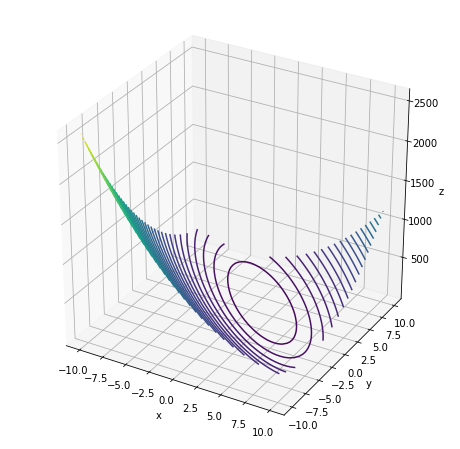

In [ ]:
Draw(But)

## Функция Матьяса

### Реализация

In [ ]:
class Matiac:

  @staticmethod
  def func(x,y):
    return 0.26*(x*x +y*y)-0.48*x*y

  @staticmethod
  def dx(x,y):
    return 0.52*x - 0.48 * y

  @staticmethod
  def dy(x,y):
    return 0.52*y - 0.48 * x

  @staticmethod
  def glob_min():
      return np.array([0,0,0])


### Визуализация графика функции

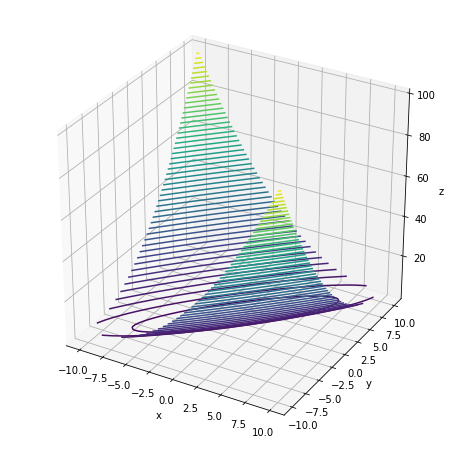

In [ ]:
Draw(Matiac)

## Функция для визуализации работы метода оптимизации

In [ ]:
def draw_res(f, grad_history):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection = '3d')
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    x_grid, y_grid = np.meshgrid(x,y)
    z_grid = f.func(x_grid, y_grid)

    glob_minimum = f.glob_min()
    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'viridis', alpha=0.5)    
    ax.plot(grad_history[:, 0], grad_history[:, 1], grad_history[:, 2], c='black', label = 'Градиентный спуск', alpha = 0.7)
    ax.scatter3D(grad_history[0, 0], grad_history[0, 1], grad_history[0, 2], s=100, c="black", ec='black', marker = 'o', label="Начальная точка")
    ax.scatter3D(grad_history[-1, 0], grad_history[-1, 1], grad_history[-1, 2], s=150, c="white", ec='black', marker = 'o', label="Найденный минимум",  alpha = 1)
    ax.scatter3D(glob_minimum[0], glob_minimum[1], glob_minimum[2], s=200, c="Blue", ec='Blue', marker = 'o', label="Глобальный минимум", alpha = 0.7)

## Классический градиентный спуск

In [ ]:
def GD( f, x0, y0, lr, max_iterations, delta = 0.001):

    '''
    f - функция оптимизации
    dx - производная по x
    dy - производная по y
    x0,y0 - начальная точка
    lr - learning rate(0.1)
    max_iterations - максимальное количество итераций)
    '''
    grad_history = [np.array([x0, y0, f.func(x0,y0)])]
    i = 0
    while (i < max_iterations and la.norm(grad_history[-1] - f.glob_min()) > delta):
        i += 1
        new_x = x0 - lr * f.dx(x0,y0)
        new_y = y0 - lr * f.dy(x0,y0)
        x0 = new_x
        y0 = new_y
        grad_history.append(np.array([x0, y0, f.func(x0, y0)]))
       
    return np.array(grad_history)

### Для функции Матьяса

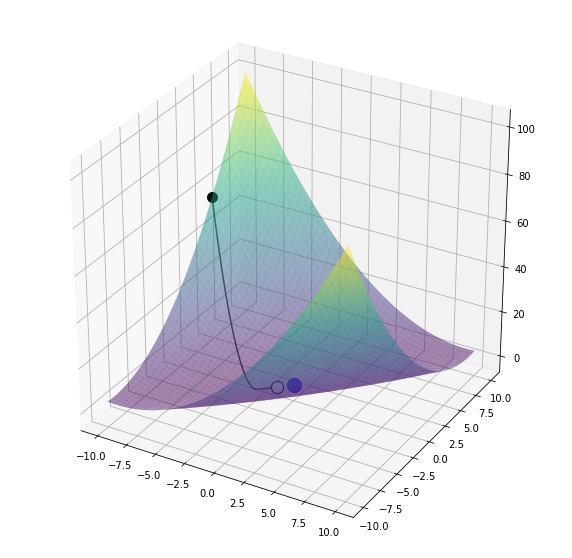

In [ ]:
x , y = -10, 5
grad_history = GD(Matiac, x, y, 0.1, 250)
draw_res(Matiac, grad_history)

### Для функции Бута

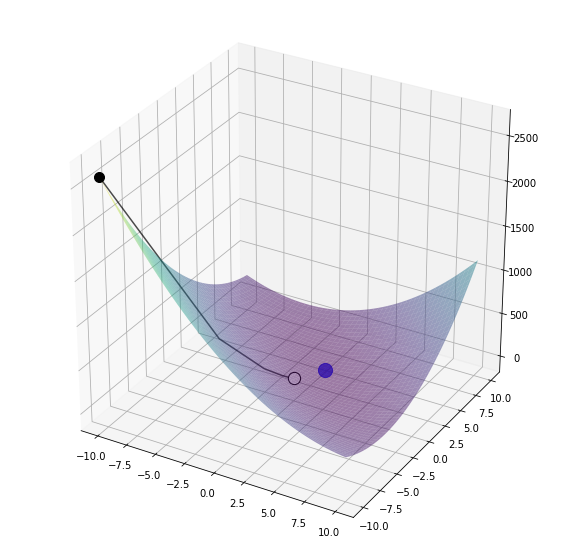

In [ ]:
x , y = -10, -10
grad_history = GD(But, x, y, 0.1, 250)
draw_res(But, grad_history)

## Моментный градиентный спуск

#### Источник: https://ruder.io/optimizing-gradient-descent/index.html#adam

In [ ]:
def MGD( f, x0, y0, lr, max_iterations):

    '''
    f - функция оптимизации
    x0,y0 - начальная точка
    lr - learning rate(0.1)
    max_iterations - максимальное количество итераций)
    '''
    grad_history = [np.array([x0, y0, f.func(x0,y0)])]
    delta = 0.001
    gamma = 0.7
    i = 0
    x_prev = x0
    y_prev = y0
    while (i < max_iterations and la.norm(grad_history[-1] - f.glob_min()) > delta):
        # new_x = x0 - lr * f.dx(x0,y0) + gamma * (x0 - x_prev)
        new_x = gamma * x0 - lr * f.dx(x0,y0) 
        new_y = gamma * y0 - lr * f.dy(x0,y0)
        # new_y = y0 - lr * f.dy(x0,y0) + gamma * (y0 - y_prev)
        x_prev = x0
        y_prev = y0 
        x0 = new_x
        y0 = new_y
        grad_history.append(np.array([x0, y0, f.func(x0, y0)]))
        i += 1
       
    return np.array(grad_history)

### Для функции Матьяса

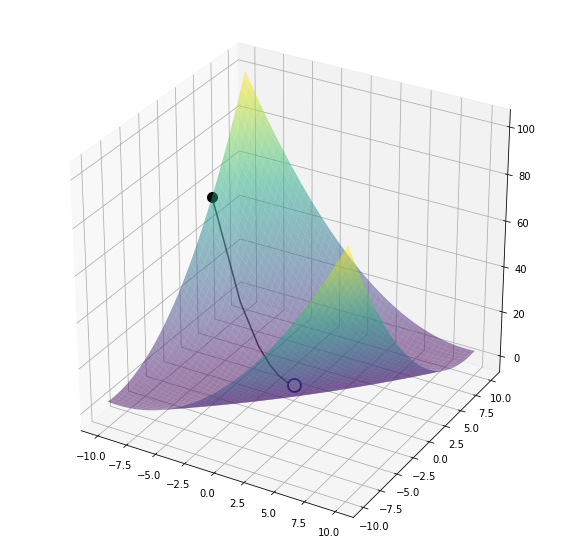

In [ ]:
x , y = -10, 5
grad_history = MGD(Matiac, x, y, 0.1, 250)
draw_res(Matiac, grad_history)

### Для функции Бута

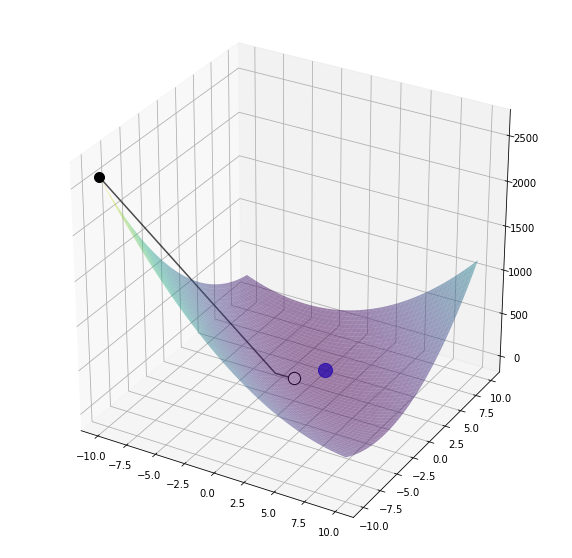

In [ ]:
x , y = -10, -10
grad_history = MGD(But, x, y, 0.1, 250)
draw_res(But, grad_history)

##  Адаптивный градиентный спуск

#### Источник: https://ruder.io/optimizing-gradient-descent/index.html#adam

In [ ]:
def AGD( f, x0, y0, lr, max_iterations, b1 = 0.6, b2 = 0.999, e = 10e-8, delta = 0.001):

    '''
    f - функция оптимизации
    x0,y0 - начальная точка
    lr - learning rate(0.1)
    max_iterations - максимальное количество итераций)
    b1 - коэф. beta1
    b2 - коэф. beta2
    delta - радиус сходимости
    '''
    grad_history = [np.array([x0, y0, f.func(x0,y0)])]
    momentum_1 = np.array([0,0])
    momentum_2 = np.array([0,0])
    i = 0
    while (i < max_iterations and la.norm(grad_history[-1] - f.glob_min()) > delta):
        # momentum_1 хранит информацию о градиентах
        momentum_1 = b1 * momentum_1 + (1 - b1) * np.array([f.dx(x0,y0), f.dy(x0, y0)]) 
        # momentum_2 хранит информацию о квадратах градиентов
        momentum_2 = b2 * momentum_2 + (1 - b2) * np.array([f.dx(x0,y0), f.dy(x0, y0)]) **2
        x0 = x0 - lr * momentum_1[0] / (np.sqrt(momentum_2[0]) + e)
        y0 = y0 - lr * momentum_1[1] / (np.sqrt(momentum_2[1]) + e)
        grad_history.append(np.array([x0, y0, f.func(x0, y0)]))
        i += 1
       
    return np.array(grad_history)

### Для функции Матьяса

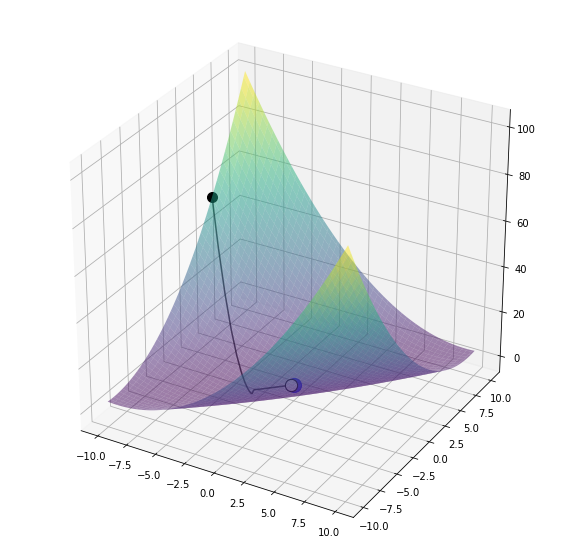

In [ ]:
x , y = -10, 5
grad_history = AGD(Matiac, x, y, 0.1, 250)
draw_res(Matiac, grad_history)

### Для функции Бута

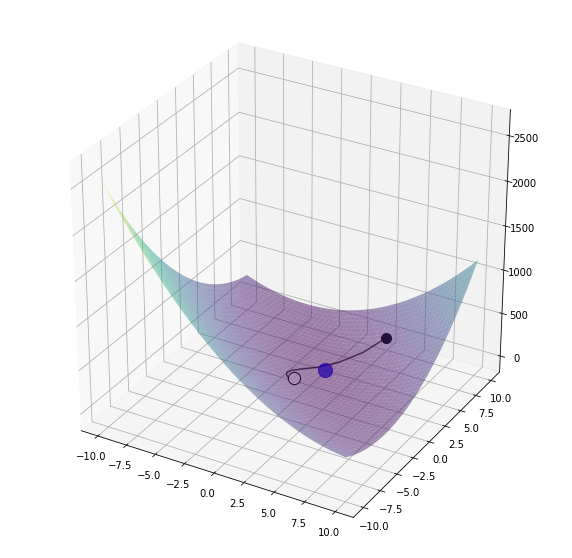

In [ ]:
x , y = 4, 7
grad_history = AGD(But, x, y, 0.1, 250)
draw_res(But, grad_history)